In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets
import requests
import time
from scipy.stats import linregress

In [2]:
#read oil csv
oil = pd.read_csv("data/Crude_Oil_Prices.csv")
oil = oil.filter(["Month","Year","Crude Oil Domestic First Purchase Price (Dollars per Barrel)","Landed Cost of Crude Oil Imports (Dollars per Barrel)"])
oil = oil[oil["Year"]>=2000]
oil = oil.dropna()
oil

,Month,Year,Crude Oil Domestic First Purchase Price (Dollars per Barrel),Landed Cost of Crude Oil Imports (Dollars per Barrel)
324,1,2000,23.53,25.61
325,2,2000,25.48,27.01
326,3,2000,26.19,26.94
327,4,2000,23.20,24.72
328,5,2000,25.58,26.71
...,...,...,...,...
560,9,2019,55.07,55.06
561,10,2019,53.14,53.72
562,11,2019,54.96,54.44
563,12,2019,58.41,53.66


In [3]:
#read gas csv
gas = pd.read_csv("data/national_fuel_avgs.csv")
gas = gas.dropna()
gas

,Year,Month,Gas Monthly Avg
0,2000,1,1.27880
1,2000,2,1.37050
2,2000,3,1.49825
3,2000,4,1.43650
4,2000,5,1.45640
...,...,...,...
240,2020,1,2.45900
241,2020,2,2.34800
242,2020,3,2.12560
243,2020,4,1.72100


In [4]:
oil.dtypes

Month                                                             int64
Year                                                              int64
Crude Oil Domestic First Purchase Price (Dollars per Barrel)    float64
Landed Cost of Crude Oil Imports (Dollars per Barrel)           float64
dtype: object

In [5]:
oil['Year'] = oil['Year'].apply(str)
oil['Month'] = oil['Month'].apply(str)
oil['Year/Month'] = oil['Year'].str.cat(oil['Month'],sep=" - ")
oil

,Month,Year,Crude Oil Domestic First Purchase Price (Dollars per Barrel),Landed Cost of Crude Oil Imports (Dollars per Barrel),Year/Month
324,1,2000,23.53,25.61,2000 - 1
325,2,2000,25.48,27.01,2000 - 2
326,3,2000,26.19,26.94,2000 - 3
327,4,2000,23.20,24.72,2000 - 4
328,5,2000,25.58,26.71,2000 - 5
...,...,...,...,...,...
560,9,2019,55.07,55.06,2019 - 9
561,10,2019,53.14,53.72,2019 - 10
562,11,2019,54.96,54.44,2019 - 11
563,12,2019,58.41,53.66,2019 - 12


In [6]:
gas['Year'] = gas['Year'].apply(str)
gas['Month'] = gas['Month'].apply(str)
gas['Year/Month'] = gas['Year'].str.cat(gas['Month'],sep=" - ")
gas

,Year,Month,Gas Monthly Avg,Year/Month
0,2000,1,1.27880,2000 - 1
1,2000,2,1.37050,2000 - 2
2,2000,3,1.49825,2000 - 3
3,2000,4,1.43650,2000 - 4
4,2000,5,1.45640,2000 - 5
...,...,...,...,...
240,2020,1,2.45900,2020 - 1
241,2020,2,2.34800,2020 - 2
242,2020,3,2.12560,2020 - 3
243,2020,4,1.72100,2020 - 4


In [7]:
merge = pd.merge(gas, oil, on="Year/Month")

merge.head()

,Year_x,Month_x,Gas Monthly Avg,Year/Month,Month_y,Year_y,Crude Oil Domestic First Purchase Price (Dollars per Barrel),Landed Cost of Crude Oil Imports (Dollars per Barrel)
0,2000,1,1.27880,2000 - 1,1,2000,23.53,25.61
1,2000,2,1.37050,2000 - 2,2,2000,25.48,27.01
2,2000,3,1.49825,2000 - 3,3,2000,26.19,26.94
3,2000,4,1.43650,2000 - 4,4,2000,23.20,24.72
4,2000,5,1.45640,2000 - 5,5,2000,25.58,26.71


In [8]:
#read gas csv
econ = pd.read_csv("data/inflation_recession_ue.csv")
econ = econ.dropna()
econ

,Month,Year,Inflation Rate,Recessionary State,Unemployment
0,1,2000,2.7,Growth,4.0
1,2,2000,3.2,Growth,4.1
2,3,2000,3.8,Growth,4.0
3,4,2000,3.1,Growth,3.8
4,5,2000,3.2,Growth,4.0
...,...,...,...,...,...
239,12,2019,2.3,Growth,3.5
240,1,2020,2.5,Growth,3.6
241,2,2020,2.3,Growth,3.5
242,3,2020,1.5,Recession,4.4


In [9]:
econ['Year'] = econ['Year'].apply(str)
econ['Month'] = econ['Month'].apply(str)
econ['Year/Month'] = econ['Year'].str.cat(econ['Month'],sep=" - ")
econ

,Month,Year,Inflation Rate,Recessionary State,Unemployment,Year/Month
0,1,2000,2.7,Growth,4.0,2000 - 1
1,2,2000,3.2,Growth,4.1,2000 - 2
2,3,2000,3.8,Growth,4.0,2000 - 3
3,4,2000,3.1,Growth,3.8,2000 - 4
4,5,2000,3.2,Growth,4.0,2000 - 5
...,...,...,...,...,...,...
239,12,2019,2.3,Growth,3.5,2019 - 12
240,1,2020,2.5,Growth,3.6,2020 - 1
241,2,2020,2.3,Growth,3.5,2020 - 2
242,3,2020,1.5,Recession,4.4,2020 - 3


In [10]:
merge2 = pd.merge(econ, oil, on="Year/Month")

merge2.head()

,Month_x,Year_x,Inflation Rate,Recessionary State,Unemployment,Year/Month,Month_y,Year_y,Crude Oil Domestic First Purchase Price (Dollars per Barrel),Landed Cost of Crude Oil Imports (Dollars per Barrel)
0,1,2000,2.7,Growth,4.0,2000 - 1,1,2000,23.53,25.61
1,2,2000,3.2,Growth,4.1,2000 - 2,2,2000,25.48,27.01
2,3,2000,3.8,Growth,4.0,2000 - 3,3,2000,26.19,26.94
3,4,2000,3.1,Growth,3.8,2000 - 4,4,2000,23.20,24.72
4,5,2000,3.2,Growth,4.0,2000 - 5,5,2000,25.58,26.71


C:\Users\Admin\Anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


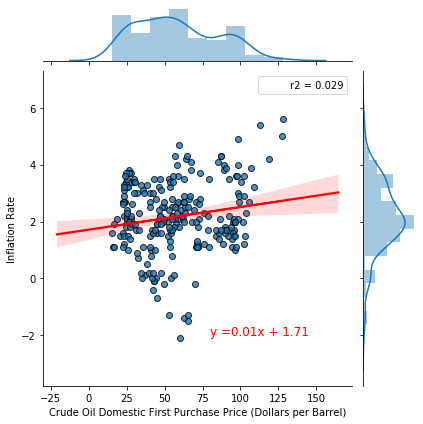

In [11]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Inflation Rate", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge2, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

#Linear Regression
x_values = merge2["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge2["Inflation Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-2),fontsize=12,color="red")

# Save plot
fig.savefig("Inflation Rate vs first.png", dpi=200)

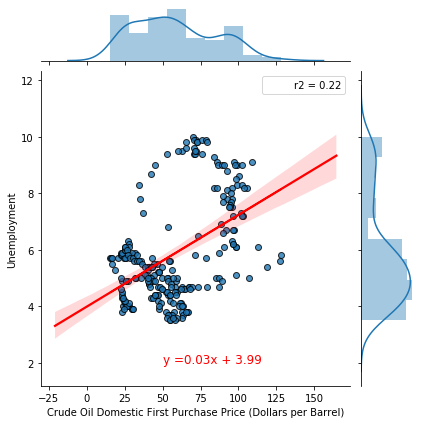

In [12]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Unemployment", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge2, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

#Linear Regression
x_values = merge2["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge2["Unemployment"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,2),fontsize=12,color="red")

# Save plot
fig.savefig("Unemployment vs first.png", dpi=200)

In [13]:
#read food csv
food = pd.read_csv("data/food_commodities.csv")
food = food.dropna()

food['Year'] = food['Year'].apply(str)
food['Month'] = food['Month'].apply(str)
food['Year/Month'] = food['Year'].str.cat(food['Month'],sep=" - ")
food

merge3 = pd.merge(food, oil, on="Year/Month")

merge3.head()

,Year_x,Month_x,Average of Wheat Value,Average of Soybean Value,Year/Month,Month_y,Year_y,Crude Oil Domestic First Purchase Price (Dollars per Barrel),Landed Cost of Crude Oil Imports (Dollars per Barrel)
0,2000,1,2.584625,4.947750,2000 - 1,1,2000,23.53,25.61
1,2000,2,2.606600,5.063950,2000 - 2,2,2000,25.48,27.01
2,2000,3,2.605978,5.238043,2000 - 3,3,2000,26.19,26.94
3,2000,4,2.540053,5.377421,2000 - 4,4,2000,23.20,24.72
4,2000,5,2.758750,5.518068,2000 - 5,5,2000,25.58,26.71


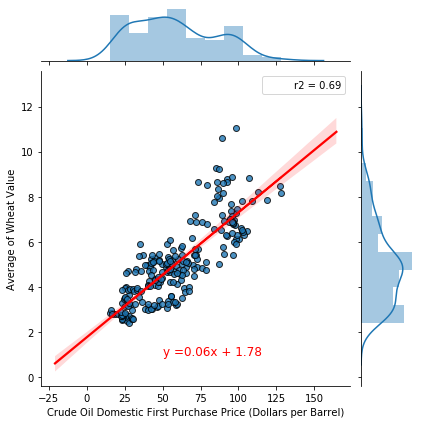

In [14]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Average of Wheat Value", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge3, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

#Linear Regression
x_values = merge3["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge3["Average of Wheat Value"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=12,color="red")

# Save plot
fig.savefig("wheat vs first.png", dpi=200)

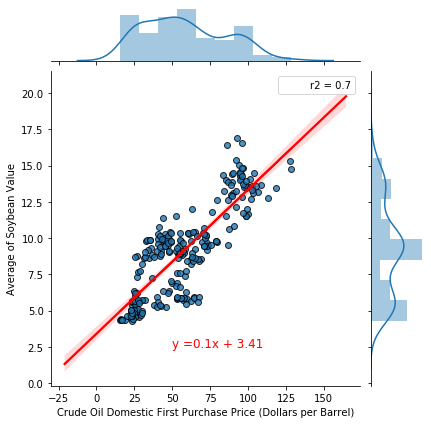

In [15]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Average of Soybean Value", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge3, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

#Linear Regression
x_values = merge3["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge3["Average of Soybean Value"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,2.5),fontsize=12,color="red")

# Save plot
fig.savefig("soy vs first.png", dpi=200)

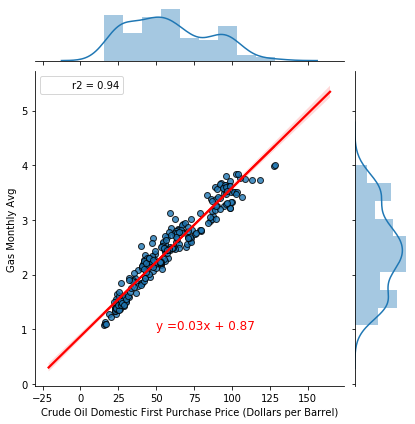

In [16]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Gas Monthly Avg", x="Crude Oil Domestic First Purchase Price (Dollars per Barrel)", data=merge, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

#Linear Regression
x_values = merge["Crude Oil Domestic First Purchase Price (Dollars per Barrel)"]
y_values = merge["Gas Monthly Avg"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=12,color="red")

# Save plot
fig.savefig("Gas vs first.png", dpi=200)

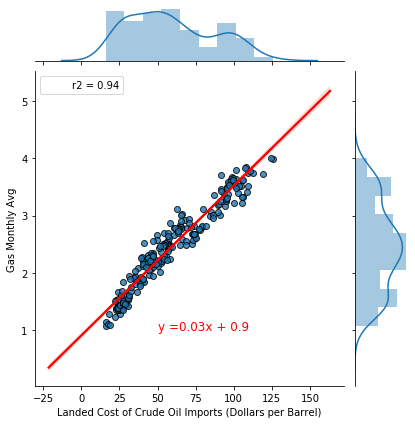

In [17]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Gas Monthly Avg", x="Landed Cost of Crude Oil Imports (Dollars per Barrel)", data=merge, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

#Linear Regression
x_values = merge["Landed Cost of Crude Oil Imports (Dollars per Barrel)"]
y_values = merge["Gas Monthly Avg"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=12,color="red")


# Save plot
fig.savefig("Gas v landed.png", dpi=200)